In [153]:
import pandas as pd
import os

In [154]:
odds = pd.read_csv('/Users/luisenriquekaiser/Documents/soccer_betting_forecast/data/odds/combined_odds.csv')
# relevant filepath
path = "/Users/luisenriquekaiser/Documents/soccer_betting_forecast/data/processed"

df_combined = pd.DataFrame()

for filename in os.listdir(path):
    filepath = os.path.join(path, filename)
    if os.path.isfile(filepath):
        # check if there is a updated in the name
        if 'updated' in filename:
            df = pd.read_csv(filepath)
            df_combined = pd.concat([df_combined, df], ignore_index=True)

In [155]:
df_combined["date"]  = pd.to_datetime(df_combined["date"], format="%Y-%m-%d", errors='coerce')
df_combined['Season'] = df_combined['date'].apply(lambda x: x.year if x.month < 8 else x.year + 1)

In [156]:
# clean home team colums for both dataframes, get rid of uppercases - and treailing spaces
df_combined['home_team'] = df_combined['home_team'].str.lower().str.strip()
df_combined['away_team'] = df_combined['away_team'].str.lower().str.strip()
odds['HomeTeam'] = odds['HomeTeam'].str.lower().str.strip()
odds['AwayTeam'] = odds['AwayTeam'].str.lower().str.strip()
odds = odds.rename(columns={'HomeTeam': 'home_team', 'AwayTeam': 'away_team'})


list_of_teams_schedule = df_combined["home_team"].unique()
list_of_away_teams_schedule = df_combined["away_team"].unique()
# union of both lists
list_of_teams_schedule = set(list_of_teams_schedule) | set(list_of_away_teams_schedule)


list_of_teams_odds = odds["home_team"].unique()
list_of_away_teams_odds = odds["away_team"].unique()
# union of both lists
list_of_teams_odds = set(list_of_teams_odds) | set(list_of_away_teams_odds)
# save list of teams in a text file
with open('/Users/luisenriquekaiser/Documents/soccer_betting_forecast/data/processed/list_of_teams.txt', 'w') as f:
    for team in list_of_teams_schedule:
        f.write(f"{team}\n")
    f.close()

with open('/Users/luisenriquekaiser/Documents/soccer_betting_forecast/data/processed/list_of_teams_odds.txt', 'w') as f:
    for team in list_of_teams_odds:
        f.write(f"{team}\n")
    f.close()

In [158]:
# read in the json from team_name_map.json in the processed folder
import json
with open('/Users/luisenriquekaiser/Documents/soccer_betting_forecast/data/processed/team_name_map.json', 'r') as f:
    team_name_map = json.load(f)
# convert the keys to lowercase

In [160]:
# apply the team_name_map to the odds and schedule dataframes
odds['home_team'] = odds['home_team'].replace(team_name_map)
odds['away_team'] = odds['away_team'].replace(team_name_map)
df_combined['home_team'] = df_combined['home_team'].replace(team_name_map)
df_combined['away_team'] = df_combined['away_team'].replace(team_name_map)

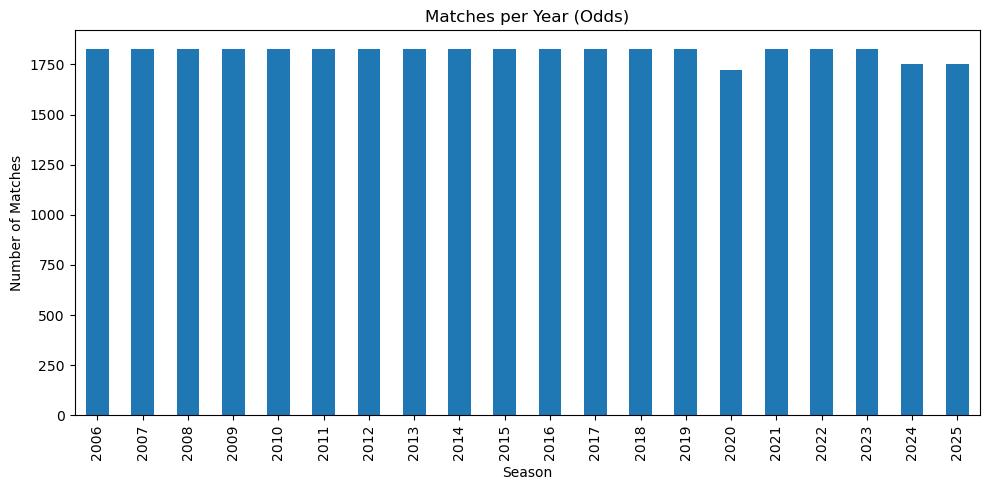

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
odds.groupby('Season').size().plot(
    kind='bar', ax=plt.gca(), title='Matches per Year (Odds)'
)
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

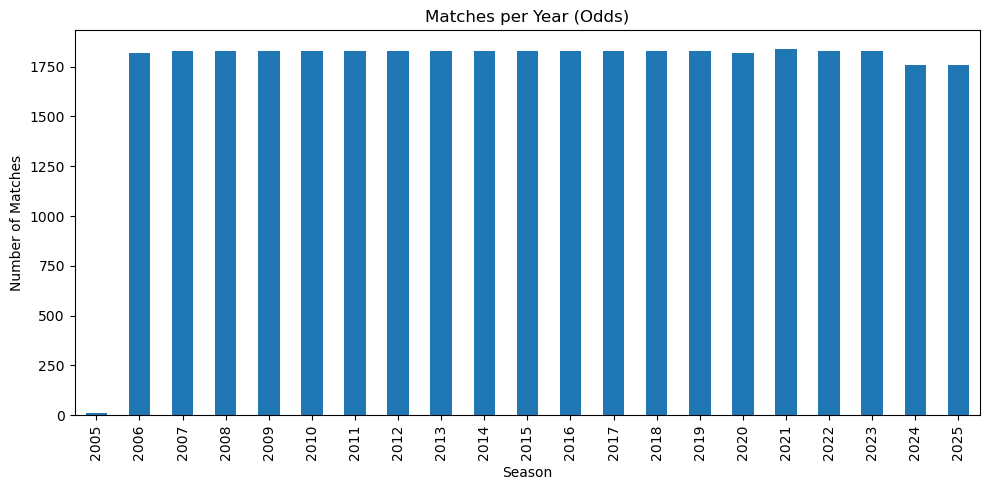

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df_combined.groupby('Season').size().plot(
    kind='bar', ax=plt.gca(), title='Matches per Year (Odds)'
)
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

In [132]:
df_combined

,week,day,date,time,home_team,score,away_team,attendance,venue,referee,match_report,notes,round,home_xg,away_xg,game_id,Season
0,1.0,Fri,2005-07-29,NaN,paris s-g,4–1,metz,NaN,Parc des Princes,Philippe Malige,/en/matches/2a1e6d82/Paris-Saint-Germain-Metz-...,NaN,NaN,NaN,NaN,2a1e6d82,2005
1,1.0,Sat,2005-07-30,NaN,lille,1–0,rennes,NaN,Stadium Lille Métropole,Éric Poulat,/en/matches/36c58483/Lille-Rennes-July-30-2005...,NaN,NaN,NaN,NaN,36c58483,2005
2,1.0,Sat,2005-07-30,NaN,marseille,0–2,bordeaux,NaN,Stade Vélodrome,Bertrand Layec,/en/matches/7100ec18/Marseille-Bordeaux-July-3...,NaN,NaN,NaN,NaN,7100ec18,2005
3,1.0,Sat,2005-07-30,NaN,nancy,0–1,monaco,NaN,Stade Marcel Picot,Philippe Kalt,/en/matches/697b7312/Nancy-Monaco-July-30-2005...,NaN,NaN,NaN,NaN,697b7312,2005
4,1.0,Sat,2005-07-30,NaN,nantes,2–0,lens,NaN,Stade de la Beaujoire,Bruno Derrien,/en/matches/5853759a/Nantes-Lens-July-30-2005-...,NaN,NaN,NaN,NaN,5853759a,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36404,38.0,Sun,2025-05-25,16:00,ipswich town,1–3,west ham,29771.0,Portman Road Stadium,Tim Robinson,/en/matches/15559cff/Ipswich-Town-West-Ham-Uni...,NaN,NaN,0.7,1.1,15559cff,2025
36405,38.0,Sun,2025-05-25,16:00,fulham,0–2,manchester city,27671.0,Craven Cottage,Andy Madley,/en/matches/3d22336e/Fulham-Manchester-City-Ma...,NaN,NaN,1.3,3.0,3d22336e,2025
36406,38.0,Sun,2025-05-25,16:00,bournemouth,2–0,leicester city,11238.0,Vitality Stadium,Lewis Smith,/en/matches/1ff370e8/Bournemouth-Leicester-Cit...,NaN,NaN,1.6,0.3,1ff370e8,2025
36407,38.0,Sun,2025-05-25,16:00,liverpool,1–1,crystal palace,60382.0,Anfield,Darren England,/en/matches/0958eb7a/Liverpool-Crystal-Palace-...,NaN,NaN,2.1,1.8,0958eb7a,2025


In [164]:
# combine both, based on home team, away team and the Season column
# first make sure the home team and away team columns are named equally
# odds HomeTeam -> home_team , AwayTeam -> away_team

# merge the two dataframes on home_team, away_team and Season
df_combined = df_combined.merge(odds, on=['home_team', 'away_team', 'Season'], how='left')

<Axes: title={'center': 'NaN Values in B365H per Season'}, xlabel='Season'>

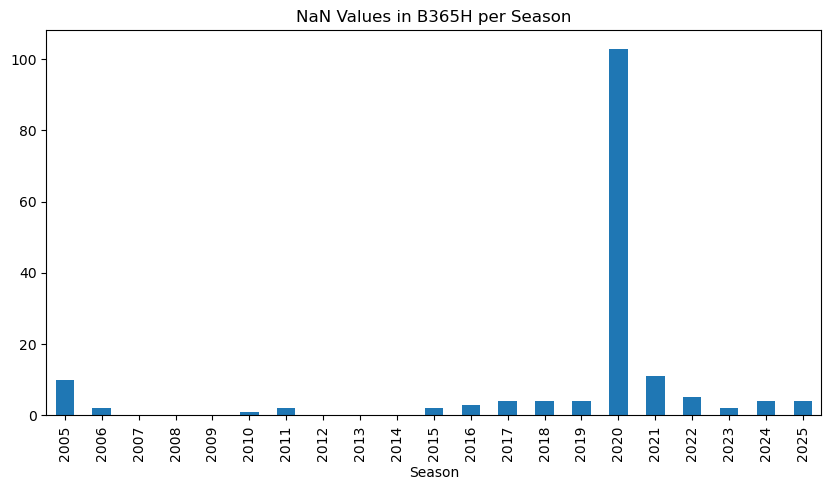

In [167]:
# plot the nan values in the B365H coliumn per season
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df_combined.groupby('Season')['B365H'].apply(lambda x: x.isna().
    sum()).plot(
    kind='bar', ax=plt.gca(), title='NaN Values in B365H per Season'
)